# Clustering Music Genres with Machine Learning

<img src='music.jpg' width=1000>

In [30]:
# Dataset import
import pandas as pd
import numpy as np
from sklearn import cluster

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Spotify-2000.csv')

In [8]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [10]:
df=df.drop('Index', axis=1) # index sütununu siliyoruz.

In [32]:
x=df[["Beats Per Minute (BPM)", "Loudness (dB)", "Liveness", "Valence", "Acousticness", "Speechiness"]]

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [75]:
model=KMeans(4) # 4 gruba ayirmak istiyoruz.

In [77]:
model=model.fit(x)

In [79]:
tahmin=model.predict(x)

In [81]:
tahmin

array([2, 0, 1, ..., 1, 1, 2])

In [83]:
x['cluster']=tahmin # dataya yeni bir sütun 'cluster' ekliyoruz.Asagidaki tabloda yeni sütunu görebiliyoruz.
# Buda yukarida yaptigimiz islemde rastgele ayirdigi gruplara verdigi sayilari bize gösteriyor.

In [85]:
x.head(10)

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,cluster
0,157,-14,11,68,94,3,2
1,135,-11,17,81,17,7,0
2,168,-9,7,52,2,17,1
3,173,-4,3,37,0,4,1
4,106,-5,10,87,1,3,0
5,99,-9,14,14,0,2,3
6,102,-6,13,54,6,3,3
7,137,-5,12,21,0,14,3
8,148,-4,10,23,0,8,1
9,112,-3,24,66,0,7,0


## Elbow Metodu

In [54]:
#wcss= within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.29714930843193454
0.2589689950164692
0.26742321063187197
0.27206830462537684
0.2716500858714201
0.2547309332880996
0.2688115385072726
0.24909144283470025


In [52]:
silhouette_score(x,tahmin)

0.2442652414345977

Text(0, 0.5, 'akustik')

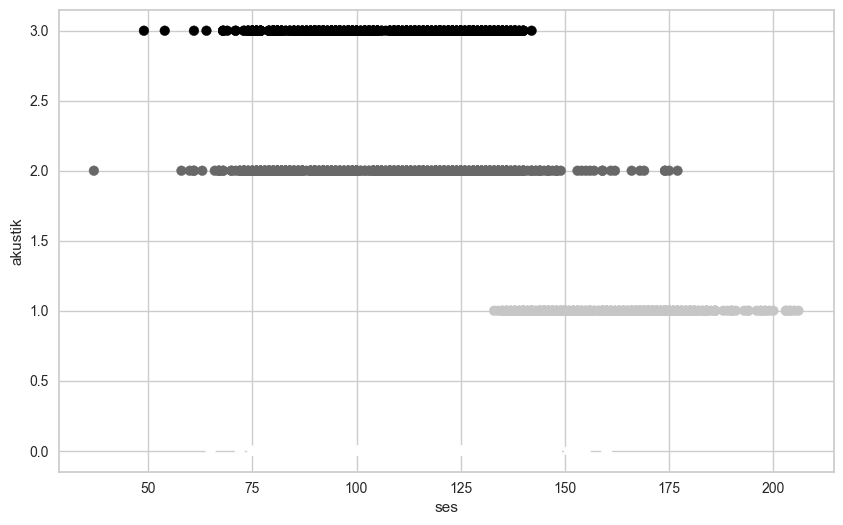

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(x["Beats Per Minute (BPM)"], x.cluster, c=tahmin)
plt.xlabel('ses')
plt.ylabel('akustik')

In [71]:
from yellowbrick.cluster import KElbowVisualizer

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


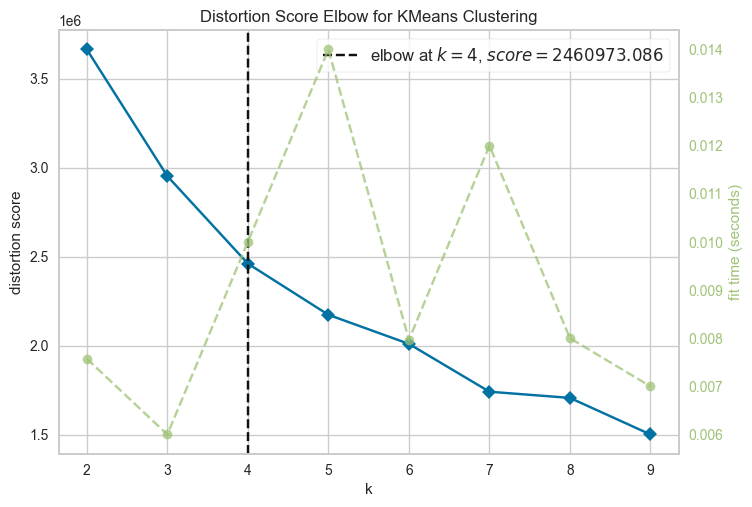

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [109]:
from sklearn.cluster import AgglomerativeClustering

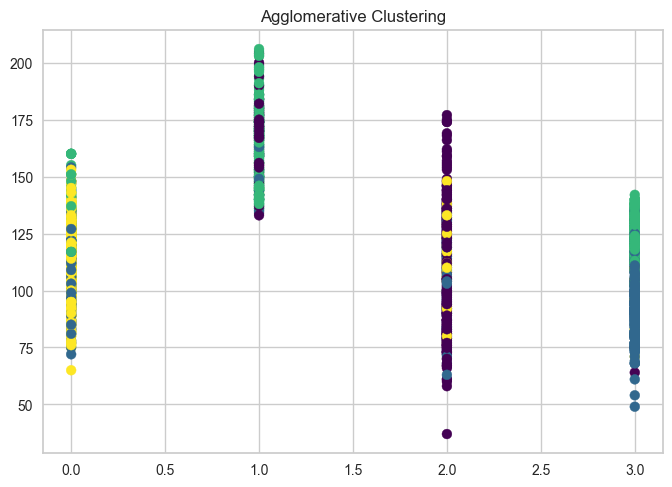

In [111]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
y_agg = agg_clustering.fit_predict(x)

#Plot the results
plt.scatter(x['cluster'],x['Beats Per Minute (BPM)'], c=y_agg, s=50, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [103]:
from sklearn.cluster import DBSCAN 

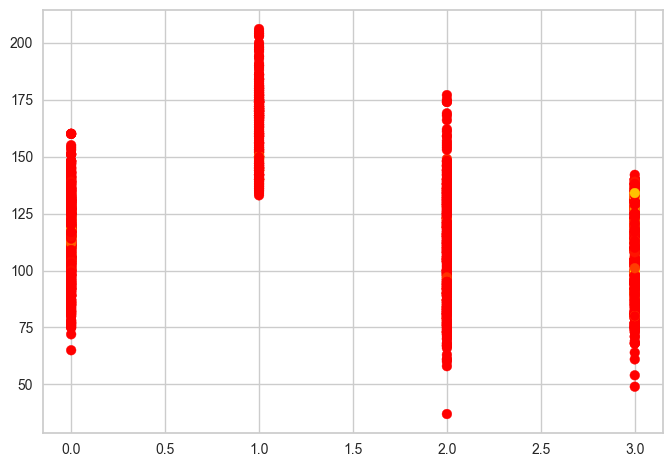

In [105]:
db=DBSCAN(min_samples=5) # en az 5 örnek olsun
from sklearn.preprocessing import StandardScaler
x2=StandardScaler().fit_transform(x)
y=db.fit_predict(x2)

plt.scatter(x['cluster'],x['Beats Per Minute (BPM)'],c=y, cmap='autumn' )
plt.savefig('clustering.png', dpi=300) # asagidaki tabloyu büyüterek calisma klasörüne kayit eder. dpi=300 resmi büyütmek icin